# Challenge 2:
# Seasonality (Animals vs Plants)

Summarises all 'question_topic' into 2 categories

## Import Libraries & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [2]:
# Import full dataset with predicted values
# Import dataset excluding rows where 'question_topic' is missing
# See 'data_wrangling_new_features.ipynb' & 'estimate_missing_topic_no_relabel.ipynb'

pred = pd.read_csv('../data/question_topic_no_missing.csv', usecols=[0,4,14,24,25,26]) # Includes predicted values
no_pred = pd.read_csv('../data/question_topic_valid.csv', usecols=[0,4,14,24,25,26]) # Only records without missing 'question_topic'

## Remove duplicate questions

In [3]:
# Drops rows based on duplicate 'question_id'
pred.drop_duplicates(subset='question_id',inplace=True)
pred.reset_index(drop=True, inplace=True)

no_pred.drop_duplicates(subset='question_id',inplace=True)
no_pred.reset_index(drop=True, inplace=True)

## Create New Question Topic For Comparing Animals to Plants

In [4]:
# There is only 1 label that is neither animal or plant which is 'mushroom'. For simplicity, 'mushroom' will be included with all plants.
animal_list = ['animals','bee','bird','camel','cat','cattle','chicken','dog','duck','fish','goat','guinea-fowl','guinea-pig','livestock',
               'locust','ostrich','pig','pigeon','poultry','rabbit','sheep','tilapia','turkey']

qt_2_pred = ['animals' if value.question_topic in animal_list else 'plants' for index, value in pred.iterrows()]
qt_2_no_pred = ['animals' if value.question_topic in animal_list else 'plants' for index, value in no_pred.iterrows()]

pred['question_topic_2'] = qt_2_pred
no_pred['question_topic_2'] = qt_2_no_pred

In [5]:
# Split dataset by country - 'ug', 'ke', 'tz'
# NB: The dataset for gb is too small an incomplete to perform a meaningful analysis so has been excluded.
ke_pred = pred[pred.question_user_country_code == 'ke'].reset_index()
tz_pred = pred[pred.question_user_country_code == 'tz'].reset_index()
ug_pred = pred[pred.question_user_country_code == 'ug'].reset_index()

ke_no_pred = no_pred[no_pred.question_user_country_code == 'ke'].reset_index()
tz_no_pred = no_pred[no_pred.question_user_country_code == 'tz'].reset_index()
ug_no_pred = no_pred[no_pred.question_user_country_code == 'ug'].reset_index()

## Kenya

In [6]:
# Drop records from the years 2017 and 2022
ke_pred.drop(ke_pred[ke_pred.year.isin([2017, 2022])].index, inplace=True)
ke_pred.reset_index(drop=True, inplace=True)

ke_no_pred.drop(ke_no_pred[ke_no_pred.year.isin([2017, 2022])].index, inplace=True)
ke_no_pred.reset_index(drop=True, inplace=True)

## Tanzania

Tanzania has missing months for 2017, 2018 and 2021 so these years will not be plotted.

In [7]:
# Drop records from the years 2017 and 2018
tz_pred.drop(tz_pred[tz_pred.year.isin([2017, 2018, 2021])].index, inplace=True)
tz_pred.reset_index(drop=True, inplace=True)

tz_no_pred.drop(tz_no_pred[tz_no_pred.year.isin([2017, 2018, 2021])].index, inplace=True)
tz_no_pred.reset_index(drop=True, inplace=True)

## Uganda

In [8]:
# Drop records from the years 2017 and 2022
ug_pred.drop(ug_pred[ug_pred.year.isin([2017,2021])].index, inplace=True)
ug_pred.reset_index(drop=True, inplace=True)

ug_no_pred.drop(ug_no_pred[ug_no_pred.year.isin([2017,2021])].index, inplace=True)
ug_no_pred.reset_index(drop=True, inplace=True)

## Barplots for Kenya, Tanzania and Uganda

In [9]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

### Kenya Excluding Missing Values

In [10]:
ke_no_pred_plot = ke_no_pred.groupby(['year','month','question_topic_2']).agg(total=('question_topic_2','count'))
ke_no_pred_plot = ke_no_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
ke_no_pred_plot = ke_no_pred_plot.groupby(['year','month']).head(2).reset_index(drop=True)

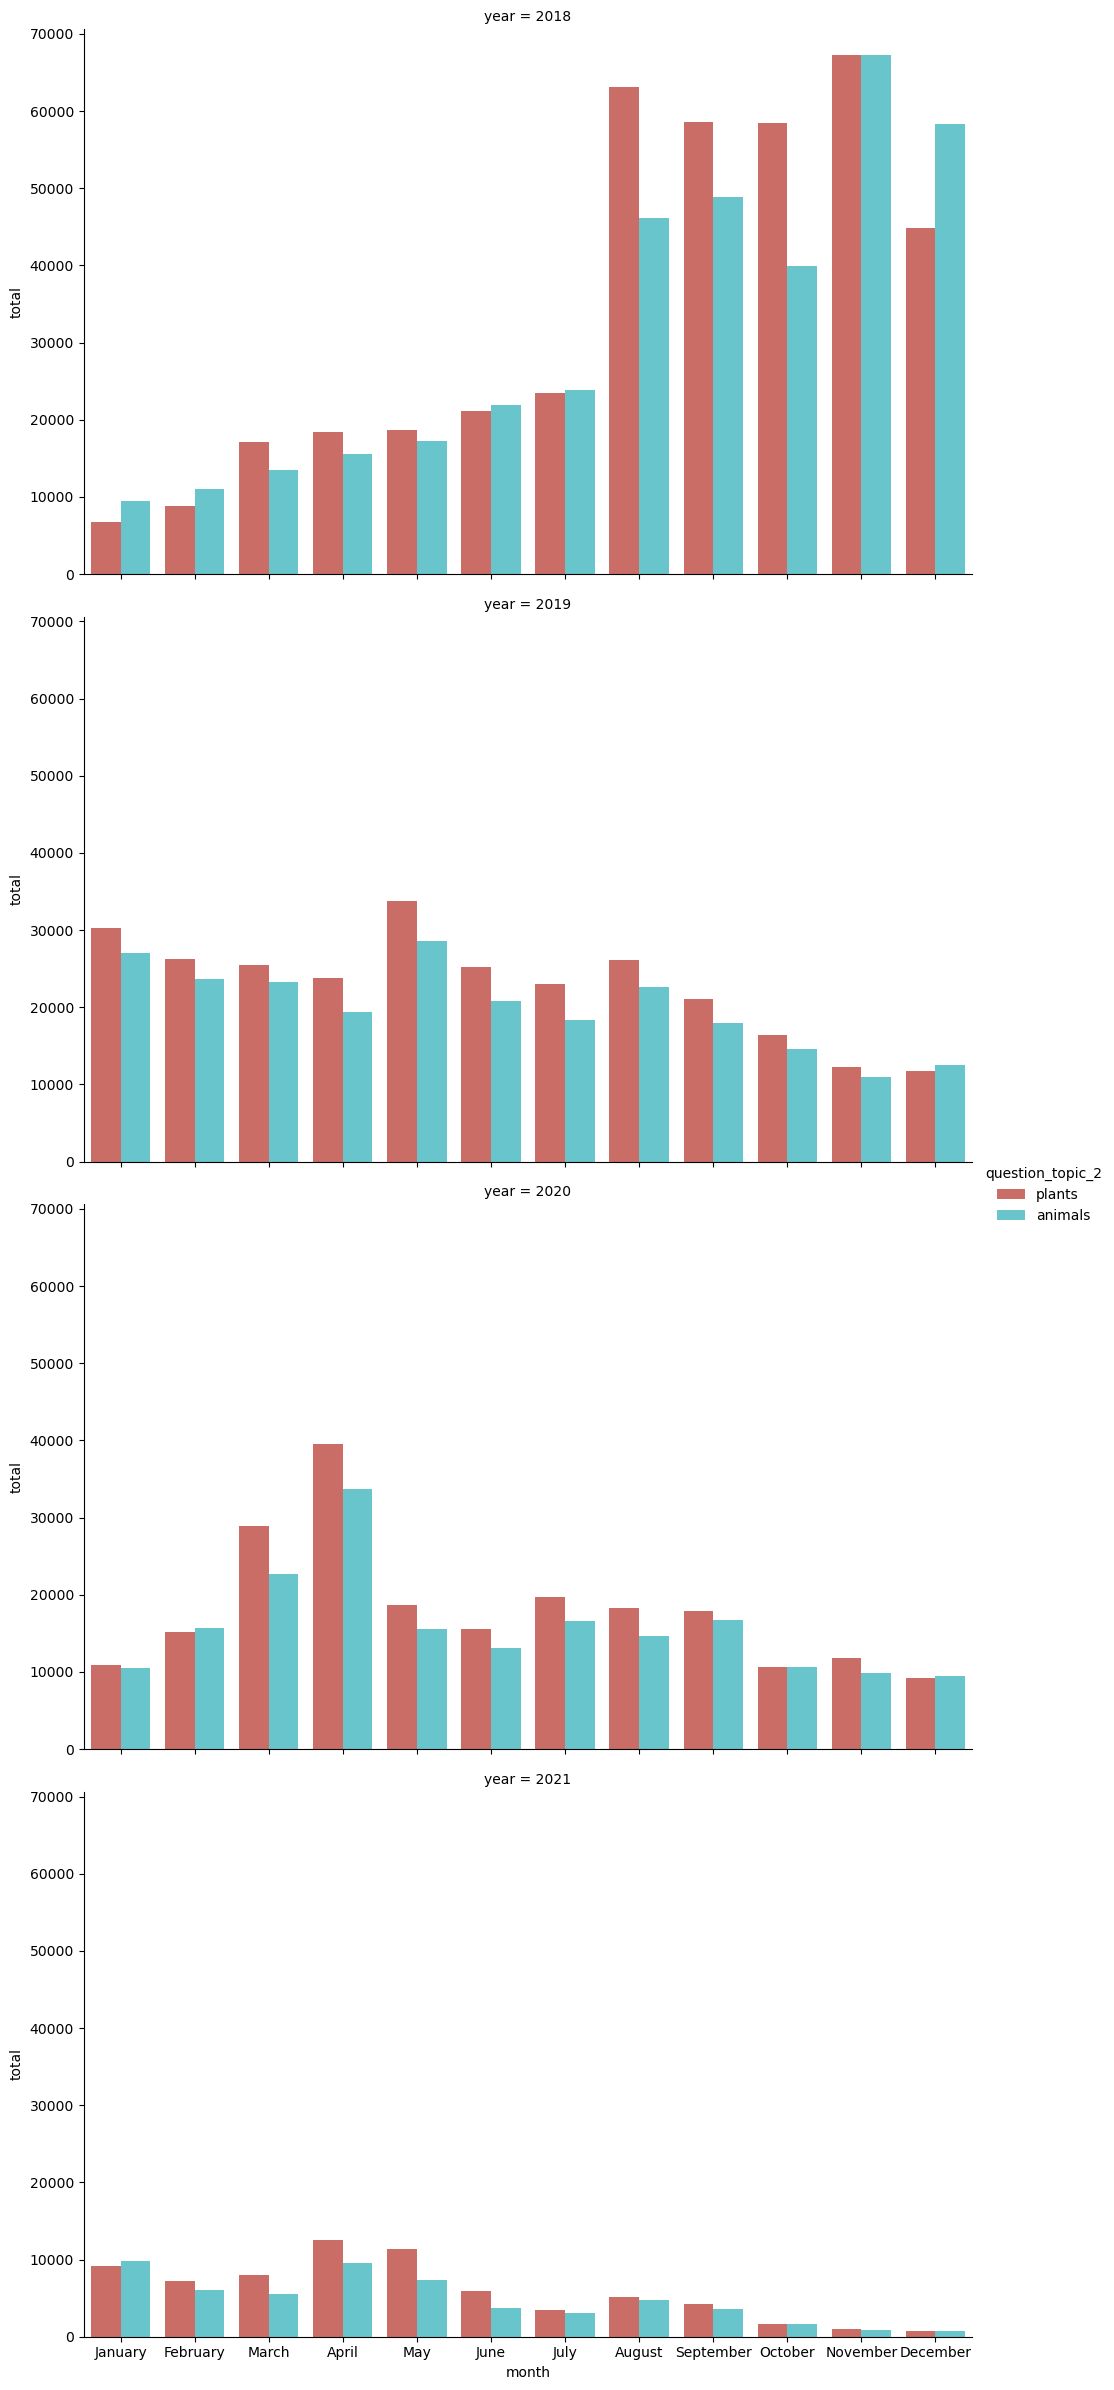

In [11]:
sns.catplot(x='month', y='total', hue='question_topic_2',row='year', data=ke_no_pred_plot, kind='bar',
            height=6, aspect=10/6, legend=True, palette='hls', order=month_list)

### Kenya Including Predicted Values For Missing Values

In [12]:
ke_pred_plot = ke_pred.groupby(['year','month','question_topic_2']).agg(total=('question_topic_2','count'))
ke_pred_plot = ke_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
ke_pred_plot = ke_pred_plot.groupby(['year','month']).head(2).reset_index(drop=True)

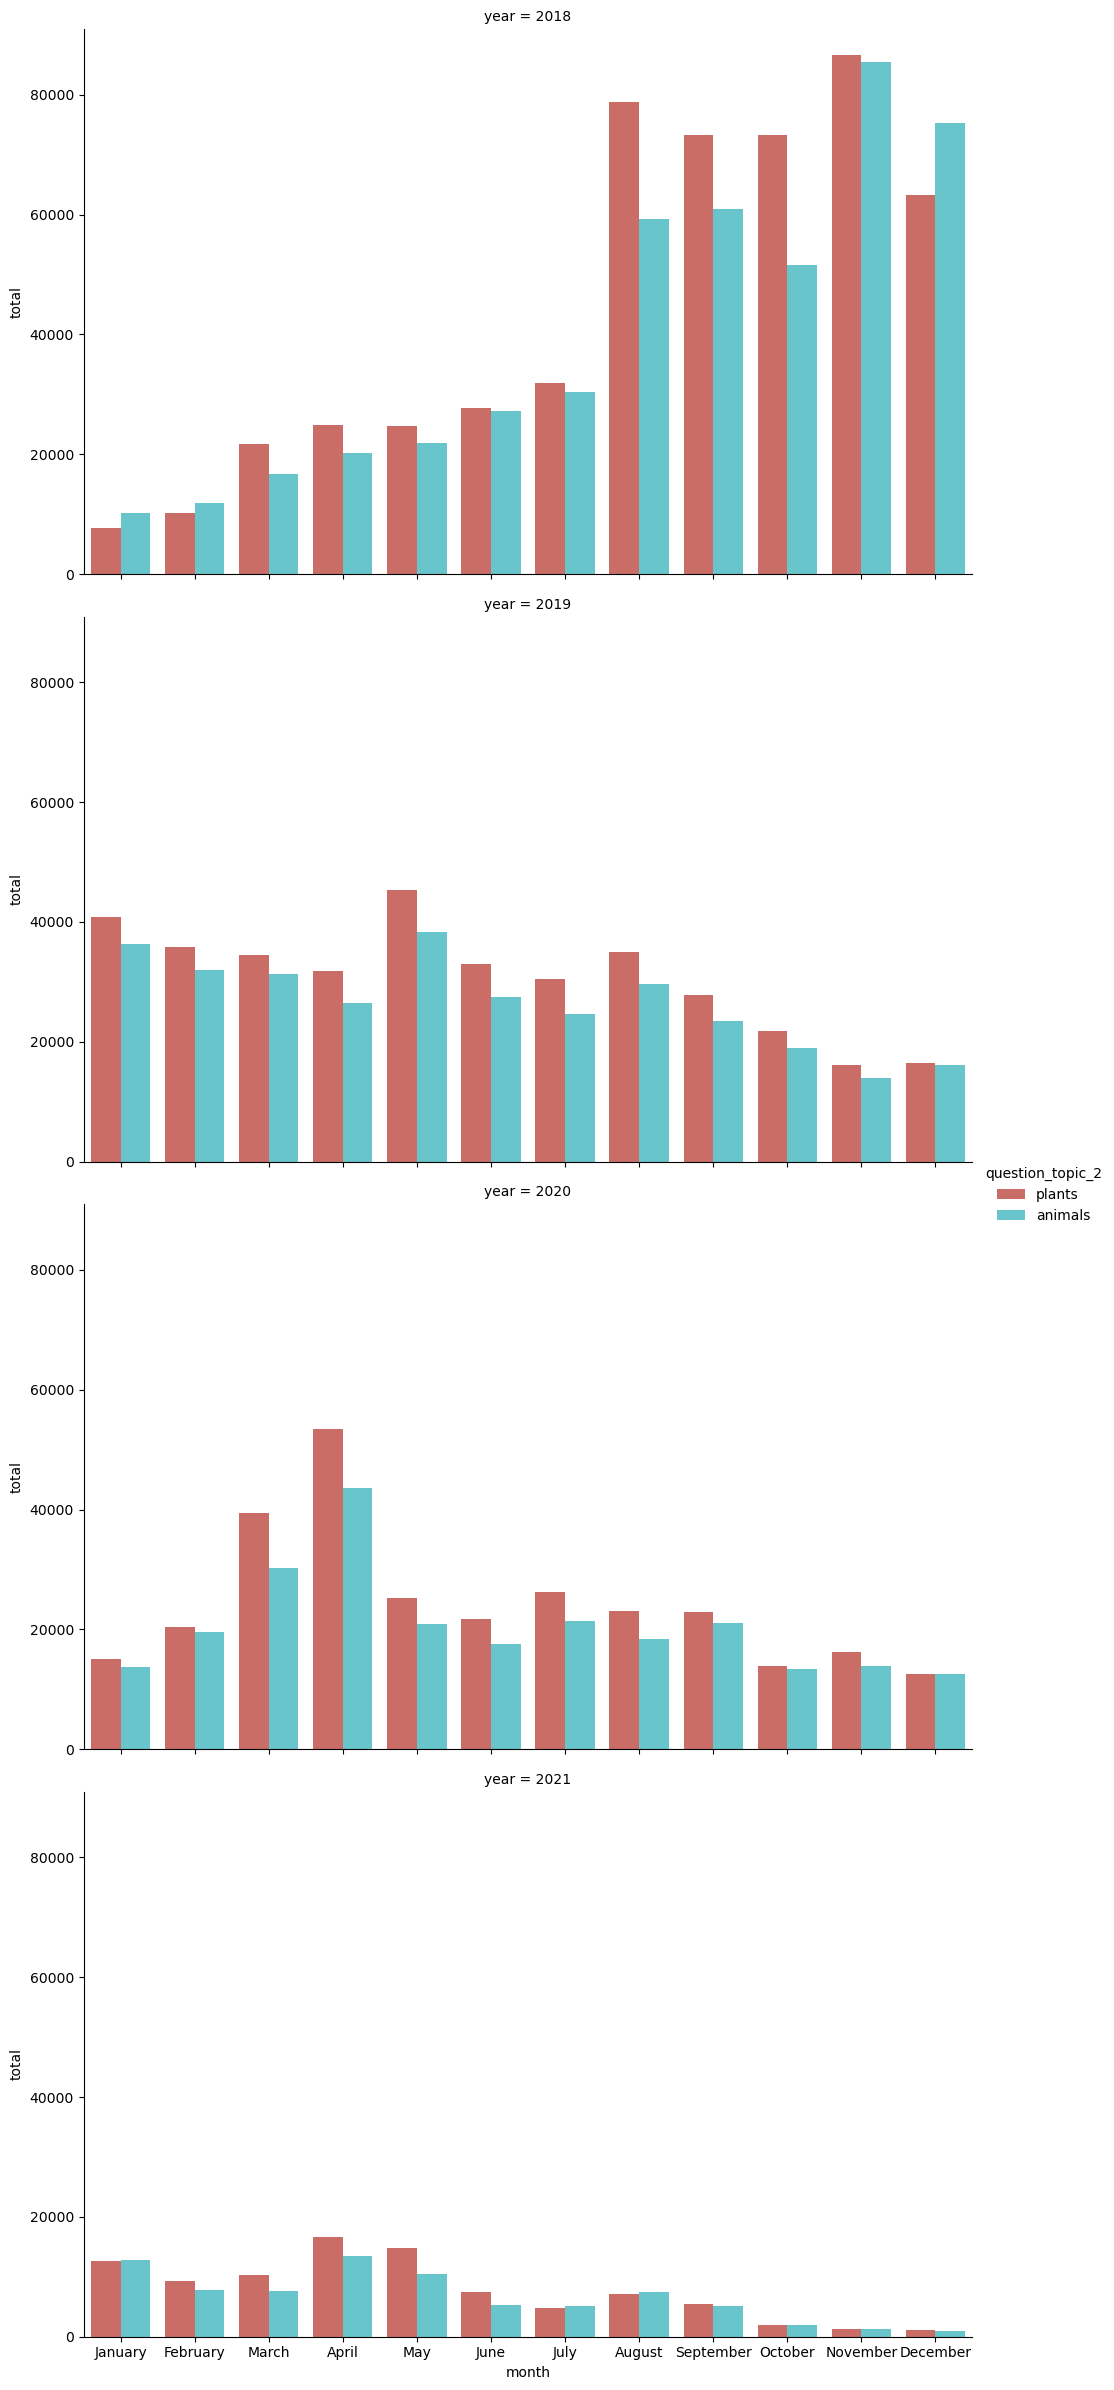

In [13]:
sns.catplot(x='month', y='total', hue='question_topic_2',row='year', data=ke_pred_plot, kind='bar',
            height=6, aspect=10/6, legend=True, palette='hls', order=month_list)

#### Kenya Summary

The trends are very similar between the dataset without the records with a missing 'question_topic' and the datset with all records including the predicted values.

From 2019 to 2021, there tends to be more questions asked in the earlier months of the year with the number gradually reducing towards the last 3 months of the year. The ratio between the number of questions recorded for animals and plants is generally consistent.

2018 is the only year that defies this trend, as the number of questions asked appears to get higher as each month passess throughout the year. This could possibly be explained by the fact that records for Kenya starts from November 2017, so perhaps not all farmers were recording the questions in the system until later in 2018. Curiously the monthly counts from August to December 2018 are noticeably higher than for any individual month between 2019 and 2021.



### Tanzania Excluding Missing Values

In [14]:
tz_no_pred_plot = tz_no_pred.groupby(['year','month','question_topic_2']).agg(total=('question_topic_2','count'))
tz_no_pred_plot = tz_no_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
tz_no_pred_plot = tz_no_pred_plot.groupby(['year','month']).head(10).reset_index(drop=True)

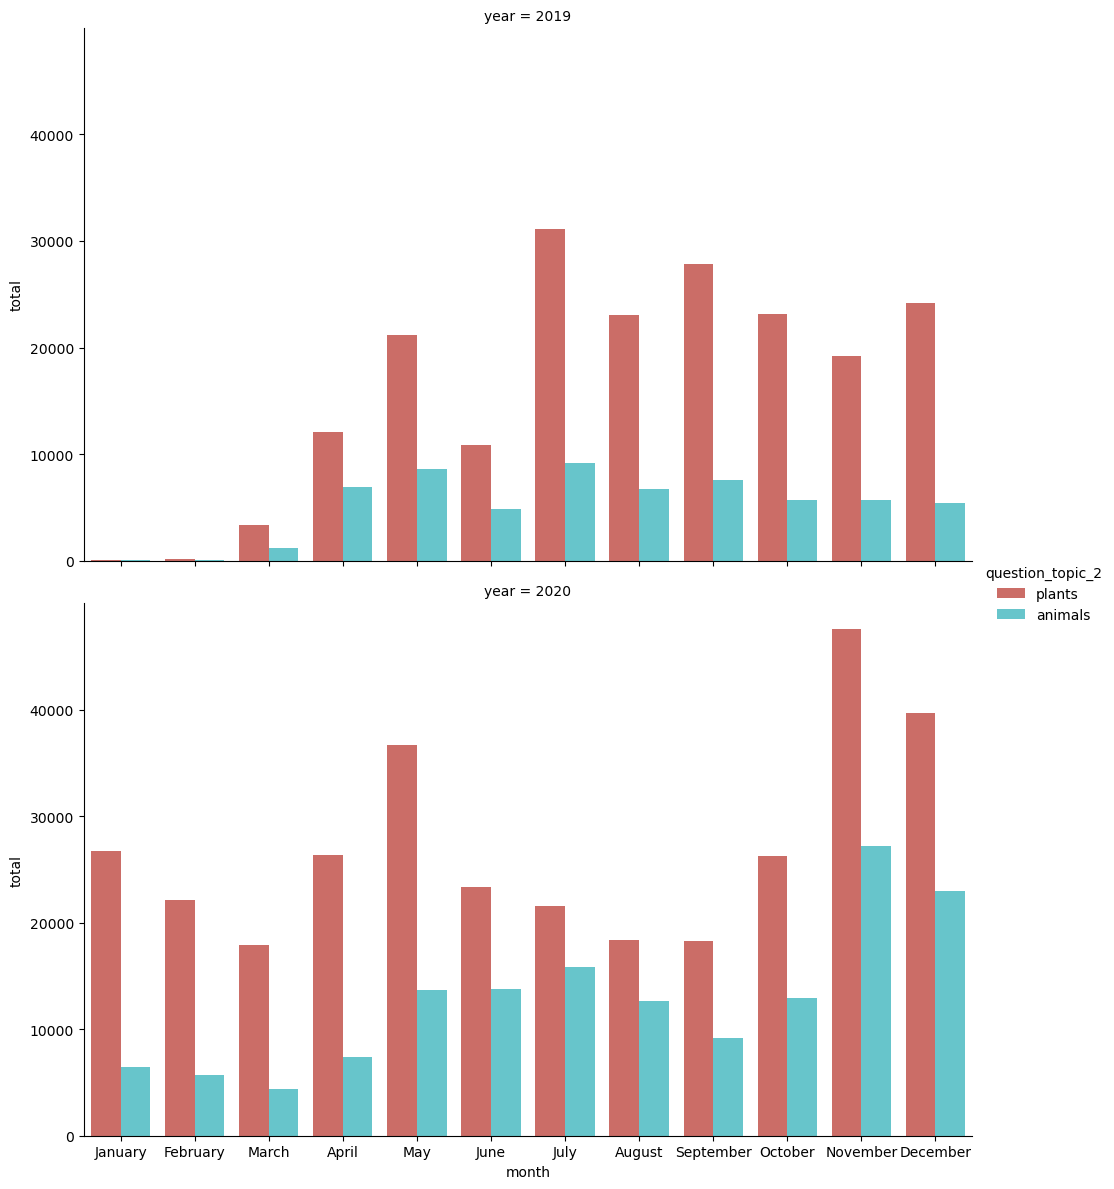

In [15]:
sns.catplot(x='month', y='total', hue='question_topic_2',row='year', data=tz_no_pred_plot, kind='bar',
            height=6, aspect=10/6, legend=True, palette='hls', order=month_list)

### Tanzania Including Predicted Values For Missing Values

In [17]:
tz_pred_plot = tz_pred.groupby(['year','month','question_topic_2']).agg(total=('question_topic_2','count'))
tz_pred_plot = tz_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
tz_pred_plot = tz_pred_plot.groupby(['year','month']).head(10).reset_index(drop=True)

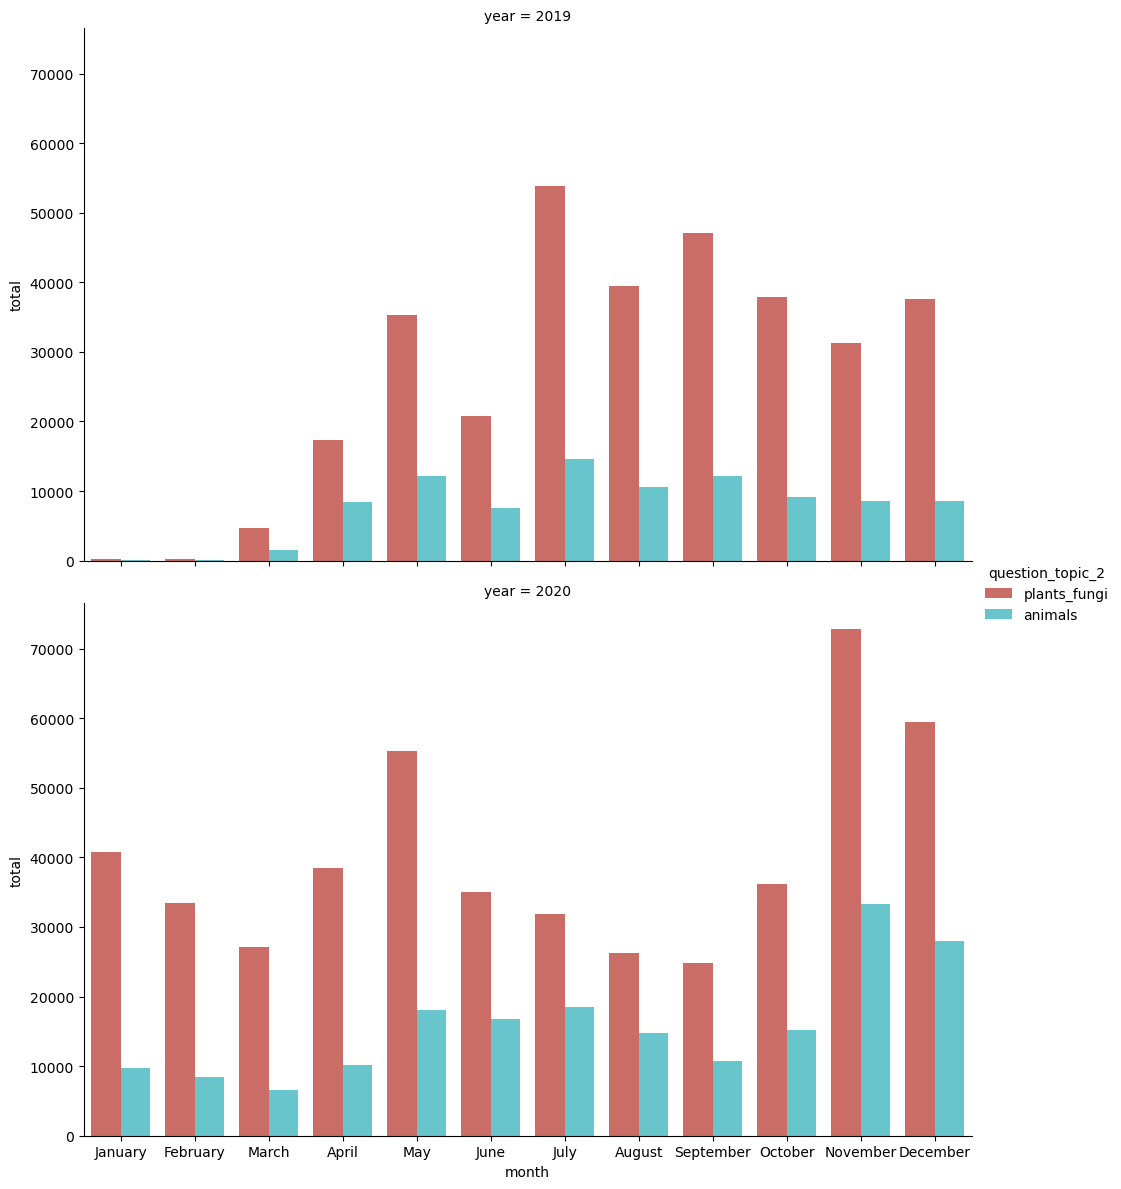

In [18]:
sns.catplot(x='month', y='total', hue='question_topic_2',row='year', data=tz_pred_plot, kind='bar',
            height=6, aspect=10/6, legend=True, palette='hls', order=month_list)

#### Tanzania Summary

The trends are very similar between the dataset without the records with a missing 'question_topic' and the datset with all records including the predicted values.

There are no obvious consistencies between 2019 and 2020. There is a gradual increase early in 2019 with a peak in July. In 2020, it is a little more consistent with the exception of the peaks for plants in May and the peaks for both categories in November and December

For the most part the ratio between animals and plants is consistent throughout the 3 years.

### Uganda Excluding Missing Values

In [16]:
ug_no_pred_plot = ug_no_pred.groupby(['year','month','question_topic_2']).agg(total=('question_topic_2','count'))
ug_no_pred_plot = ug_no_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
ug_no_pred_plot = ug_no_pred_plot.groupby(['year','month']).head(10).reset_index(drop=True)

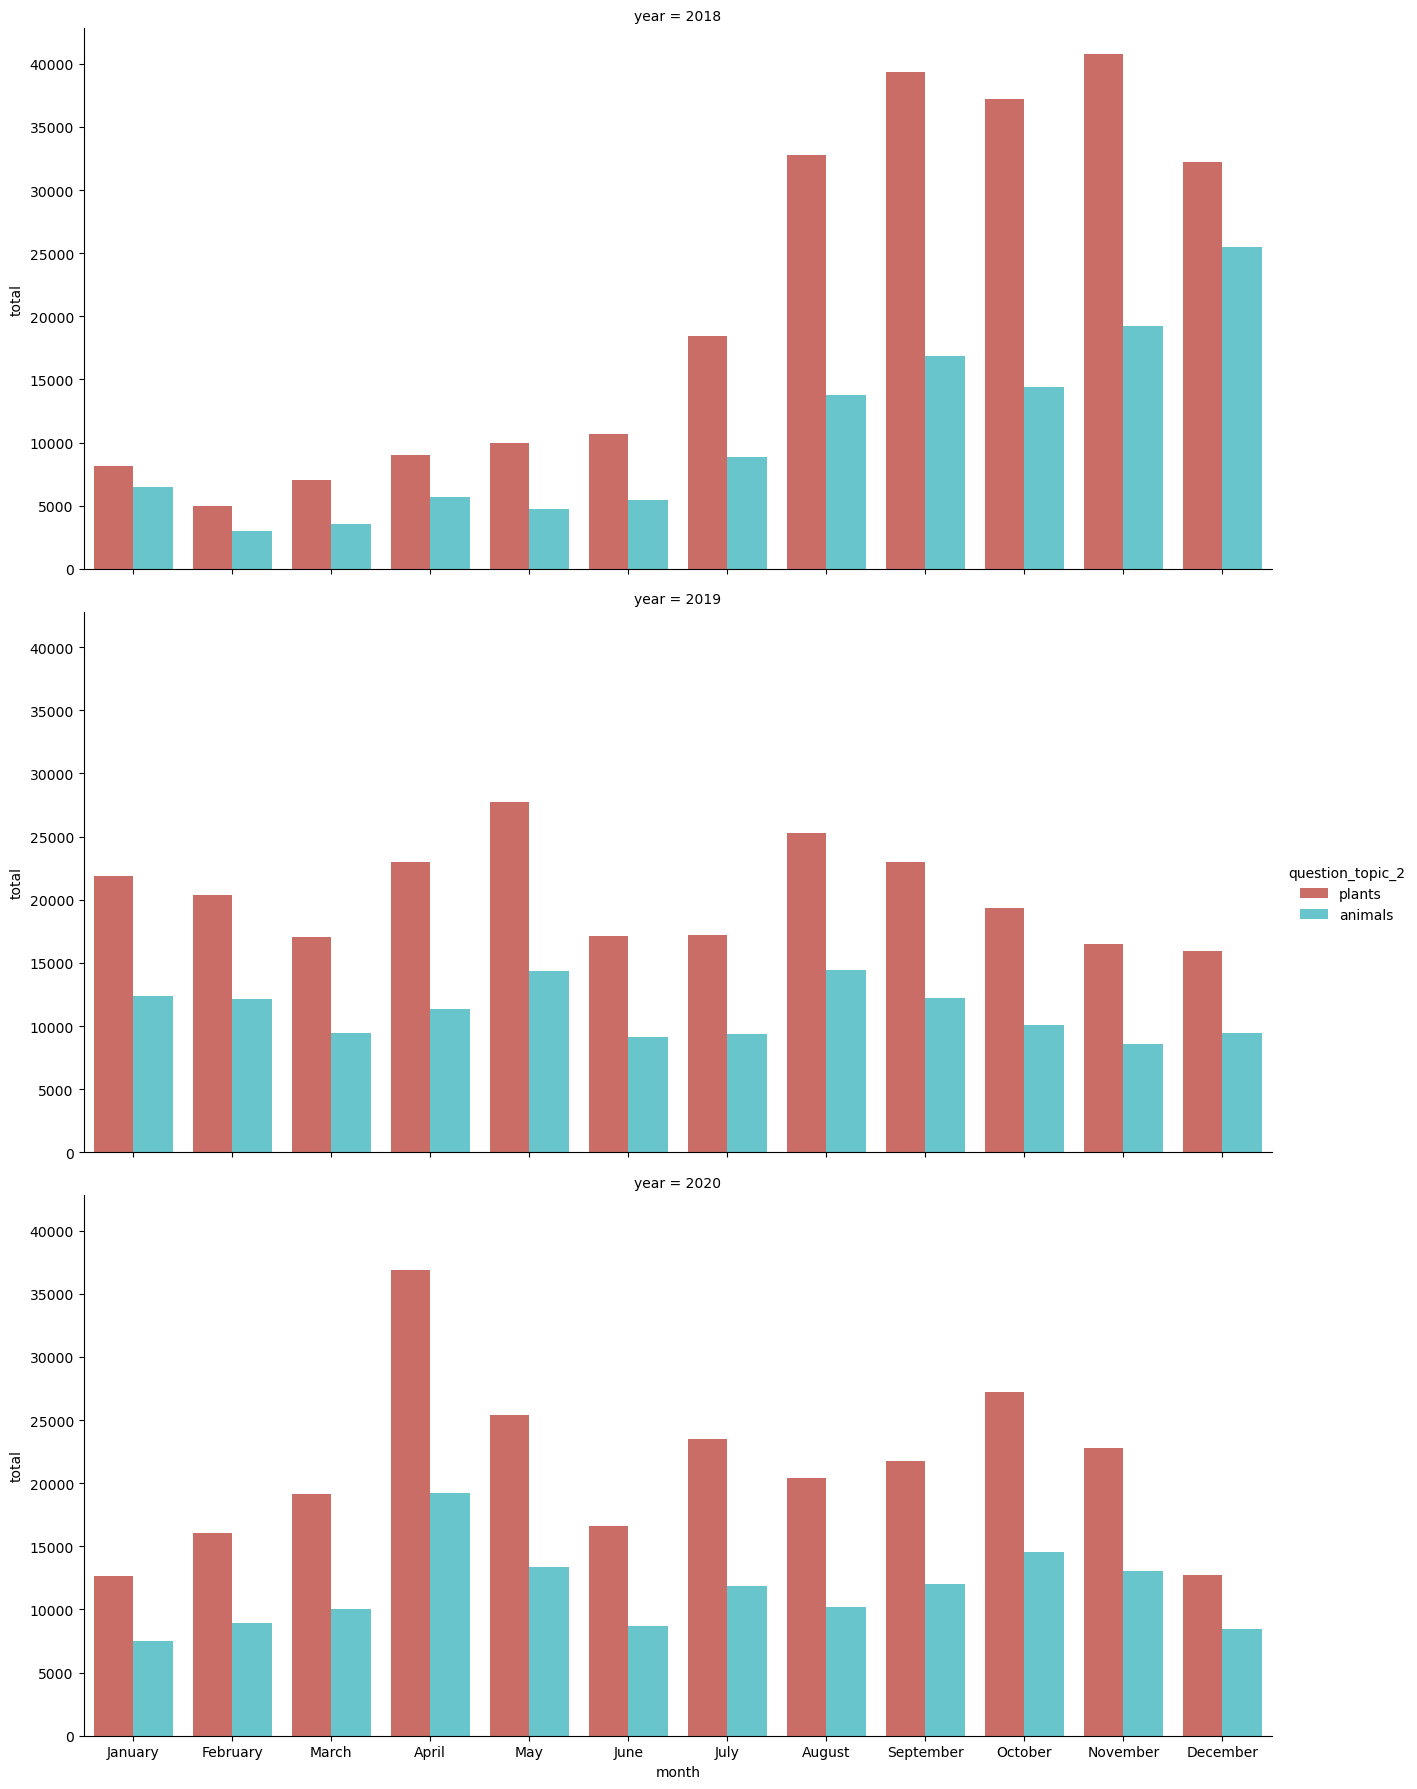

In [17]:
sns.catplot(x='month', y='total', hue='question_topic_2',row='year', data=ug_no_pred_plot, kind='bar',
            height=6, aspect=13/6, legend=True, palette='hls', order=month_list)

### Uganda Including Predicted Values For Missing Values

In [21]:
ug_pred_plot = ug_pred.groupby(['year','month','question_topic_2']).agg(total=('question_topic_2','count'))
ug_pred_plot = ug_pred_plot.sort_values(by=['year','month','total'],ascending=[True,True,False]).reset_index()
ug_pred_plot = ug_pred_plot.groupby(['year','month']).head(10).reset_index(drop=True)

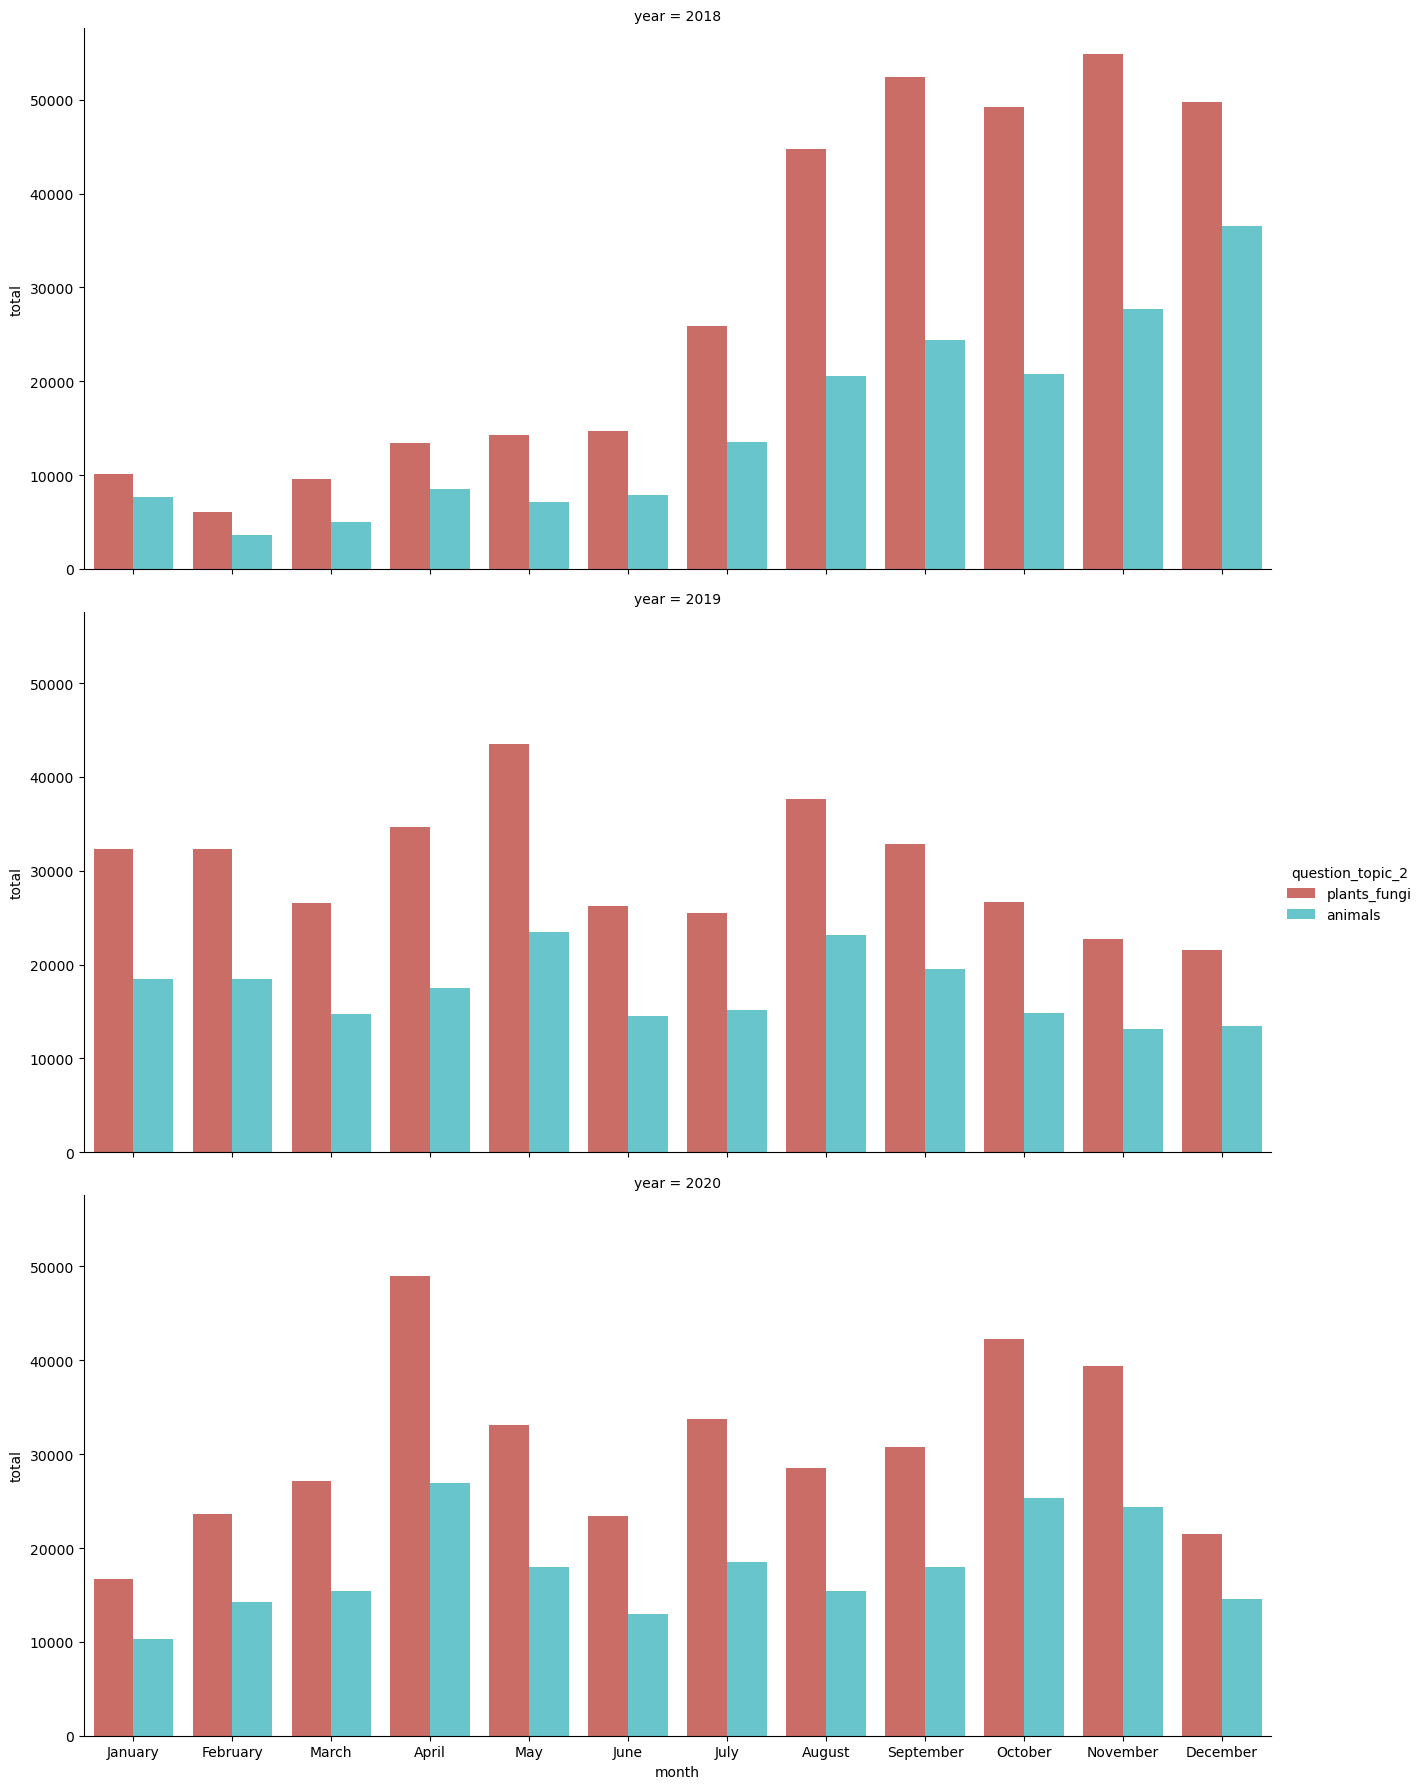

In [22]:
sns.catplot(x='month', y='total', hue='question_topic_2',row='year', data=ug_pred_plot, kind='bar',
            height=6, aspect=13/6, legend=True, palette='hls', order=month_list)

#### Uganda Summary

The trends are very similar between the dataset without the records with a missing 'question_topic' and the datset with all records including the predicted values.

Similar to Tanzania, there does not seem to be a noticeable trend in the number of questions. However, 2019 and 2020 appear to be more similar then 2018 which shows a gradual increase in questions over the year.

The ratio between animal questions and plant is generally consistent over the three years.

## Overall Summary
- Between 2019 and 2021 in Kenya, there does appear to be evidence of the number of questions impacted by the time of the year where more questions tend to be asked earlier in the year with a noticeable decline in the last 3 months of the year.
- No noticeable seasonal trends for Tanzania and Uganda
- If there are any seasonal patterns it appears to affect questions regarding animals and plants equally.
- Even after including the predicted values where the 'question_topic' was missing, there is no noticeable change in the plots.

## Suggestions

As different plants have different requirements and are affected by the weather or other factors differently, breaking the dataset into plant sub-categories may produce more meaningful results.

NB: Some question_topic values have been labelled with generic terms like plants or crops so this will make the above suggestion challenging.
    An expert in plants may also be required to ensure that plants are being proerly categorised in any sub groups used.